# This code is to make a Pytorch model of a basic neural network

In [272]:

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
import timm

import matplotlib.pyplot as plt # For data viz
import pandas as pd
import numpy as np
import sys
from tqdm.notebook import tqdm

print('System Version:', sys.version)
print('PyTorch version', torch.__version__)
print('Torchvision version', torchvision.__version__)
print('Numpy version', np.__version__)
print('Pandas version', pd.__version__)

System Version: 3.13.5 | packaged by Anaconda, Inc. | (main, Jun 12 2025, 16:37:03) [MSC v.1929 64 bit (AMD64)]
PyTorch version 2.9.0+cpu
Torchvision version 0.24.0+cpu
Numpy version 2.3.4
Pandas version 2.2.3


In [273]:
# This is the class for the data set, setting up the initation, 
# Length of the dataset
# And the get item

class ShapeDataset(Dataset):
    def __init__(self, data_dir, transform=None): # This initates the data
        self.data = ImageFolder(data_dir, transform=transform)
    
    def __len__(self):
        return len(self.data) #checks the length of the data
    
    def __getitem__(self, idx):
        return self.data[idx] # This is for the labelling the idx is the tag.
    
    @property
    def classes(self): # returns all the data of the class
        return self.data.classes

In [274]:
# Lets load in the data set with different shapes

Dataset = ShapeDataset(
    data_dir='Shapes'
    )

In [275]:
len(Dataset) # This checks how many images there are 

27

0


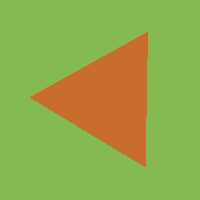

In [276]:
image,label = Dataset[6]
print(label)
image # To check the images.

# We are then going to resize the images to a smaller size and start with a smaller neural network maybe of 6 shapes

    So we can use a dataloader and format the files to work for our specific needs 

So the first part of the code we have to practice trying to input the data, so i might just do one with 

In [277]:
# Translate the data from the start

In [278]:
# For transformation

transform = transforms.Compose([
    transforms.Resize((28,28)),
    transforms.ToTensor()
])

#uses the transform function to be able to 
train_folder = 'Shapes\Train'
valid_folder = 'Shapes\Valid'
test_folder = 'Shapes\Test'

train_dataset = ShapeDataset(train_folder, transform=transform)
val_dataset = ShapeDataset(valid_folder, transform=transform)
test_dataset = ShapeDataset(test_folder, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=3, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=3, shuffle=False)
test_loader = DataLoader(val_dataset, batch_size=3, shuffle=False)

In [279]:
print(image)

<PIL.Image.Image image mode=RGB size=200x200 at 0x2571B95FA70>


In [280]:

device = torch.accelerator.current_accelerator().type if torch.accelerator.is_available() else "cpu"
print(f"Using {device} device")

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28*3, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)

        )

    def forward(self,x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

Using cpu device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=2352, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [281]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2) # This goes and adjusts the model using loss

In [282]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        print(X.shape)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


In [283]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [284]:
epochs = 20
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_loader, model, loss_fn, optimizer)
    test(test_loader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
torch.Size([3, 3, 28, 28])
loss: 2.256374  [    3/    9]
torch.Size([3, 3, 28, 28])
torch.Size([3, 3, 28, 28])
Test Error: 
 Accuracy: 55.6%, Avg loss: 2.122061 

Epoch 2
-------------------------------
torch.Size([3, 3, 28, 28])
loss: 2.152141  [    3/    9]
torch.Size([3, 3, 28, 28])
torch.Size([3, 3, 28, 28])
Test Error: 
 Accuracy: 55.6%, Avg loss: 1.995548 

Epoch 3
-------------------------------
torch.Size([3, 3, 28, 28])
loss: 2.093723  [    3/    9]
torch.Size([3, 3, 28, 28])
torch.Size([3, 3, 28, 28])
Test Error: 
 Accuracy: 55.6%, Avg loss: 1.859799 

Epoch 4
-------------------------------
torch.Size([3, 3, 28, 28])
loss: 1.848426  [    3/    9]
torch.Size([3, 3, 28, 28])
torch.Size([3, 3, 28, 28])
Test Error: 
 Accuracy: 55.6%, Avg loss: 1.706653 

Epoch 5
-------------------------------
torch.Size([3, 3, 28, 28])
loss: 1.691910  [    3/    9]
torch.Size([3, 3, 28, 28])
torch.Size([3, 3, 28, 28])
Test Error: 
 Accuracy: 88.9%, Avg lo

In [285]:
torch.save(model.state_dict(), "model.pth")
print("Saved PyTorch Model State to model.pth") # So you export the model 

Saved PyTorch Model State to model.pth


In [286]:
model = NeuralNetwork().to(device)
model.load_state_dict(torch.load("model.pth", weights_only=True)) # Load the Model in 

<All keys matched successfully>

In [287]:
classes = [
    "Circle",
     "Square",
     "Triangle"
]

model.eval()
x, y = test_dataset[0][0], test_dataset[0][1]
with torch.no_grad():
    x = x.to(device)
    pred = model(x)
    predicted, actual = classes[pred[0].argmax(0)], classes[y]
    print(f'Predicted: "{predicted}", Actual: "{actual}"')

RuntimeError: mat1 and mat2 shapes cannot be multiplied (3x784 and 2352x512)